In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/West_Nile_Virus__WNV__Mosquito_Test_Results.csv")

In [ ]:
data['SPECIES'] = data['SPECIES'].astype('category')
data['SPECIES'] = data['SPECIES'].cat.codes

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
#Standardize

x = data['SPECIES'].values
scaler = StandardScaler()

data['SPECIES'] = scaler.fit_transform(np.reshape(x,(-1,1)))
data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,-0.328269,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,-0.328269,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,-0.328269,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,-0.328269,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,-0.328269,NaN,NaN,NaN


In [ ]:
bins = np.linspace(data['WEEK'].min(),data['WEEK'].max(),6)

labels = ['xs','s','m','l','xl']

data['WEEK'] = pd.cut(data['WEEK'] , bins=bins, labels=labels, include_lowest=True)

In [ ]:
data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,xl,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,-0.328269,NaN,NaN,NaN
1,2016,xl,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,-0.328269,NaN,NaN,NaN
2,2017,l,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,-0.328269,NaN,NaN,NaN
3,2017,l,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,-0.328269,NaN,NaN,NaN
4,2016,xl,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,-0.328269,NaN,NaN,NaN


In [ ]:
data.LOCATION.replace(np.nan,'null',inplace=True)

In [ ]:
data['LOCATION'].isnull().sum()

0

In [ ]:
data['TRAP'].describe()

count     29489
unique      193
top        T115
freq        787
Name: TRAP, dtype: object

In [ ]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)

In [ ]:
data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,xl,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,-0.328269,NaN,NaN,null
1,2016,xl,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,-0.328269,NaN,NaN,null
2,2017,l,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,-0.328269,NaN,NaN,null
3,2017,l,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,-0.328269,NaN,NaN,null
4,2016,xl,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,-0.328269,NaN,NaN,null


In [ ]:
data[['SEASON YEAR','NUMBER OF MOSQUITOES','SPECIES']].corr()

,SEASON YEAR,NUMBER OF MOSQUITOES,SPECIES
SEASON YEAR,1.000000,-0.018555,0.195687
NUMBER OF MOSQUITOES,-0.018555,1.000000,-0.148647
SPECIES,0.195687,-0.148647,1.000000


In [ ]:
data1 = data[['WEEK' ,'TEST DATE','TRAP','NUMBER OF MOSQUITOES', 'RESULT','SPECIES','LOCATION']]
data1.head()

,WEEK,TEST DATE,TRAP,NUMBER OF MOSQUITOES,RESULT,SPECIES,LOCATION
0,xl,09/25/2014 12:09:00 AM,T902,8,negative,-0.328269,null
1,xl,09/15/2016 12:09:00 AM,T902,39,negative,-0.328269,null
2,l,08/17/2017 12:08:00 AM,T905,50,positive,-0.328269,null
3,l,08/17/2017 12:08:00 AM,T900,17,positive,-0.328269,null
4,xl,09/15/2016 12:09:00 AM,T135,12,negative,-0.328269,null


In [ ]:
data1['WEEK'] = data1['WEEK'].astype('category')
data1['WEEK'] = data1['WEEK'].cat.codes

data1['TRAP'] = data1['TRAP'].astype('category')
data1['TRAP'] = data1['TRAP'].cat.codes

data1['TEST DATE'] = data1['TEST DATE'].astype('category')
data1['TEST DATE'] = data1['TEST DATE'].cat.codes

data1['SPECIES'] = data1['SPECIES'].astype('category')
data1['SPECIES'] = data1['SPECIES'].cat.codes

data1['LOCATION'] = data1['LOCATION'].astype('category')
data1['LOCATION'] = data1['LOCATION'].cat.codes

In [ ]:
data1.head()

,WEEK,TEST DATE,TRAP,NUMBER OF MOSQUITOES,RESULT,SPECIES,LOCATION
0,4,284,171,8,negative,2,162
1,4,260,171,39,negative,2,162
2,3,190,174,50,positive,2,162
3,3,190,169,17,positive,2,162
4,4,260,106,12,negative,2,162


In [ ]:
X = data1.drop('RESULT',axis=1)
y = data1['RESULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23591, 6), (5898, 6), (23591,), (5898,))

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
accuracy = model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  91.48864021702272 %


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

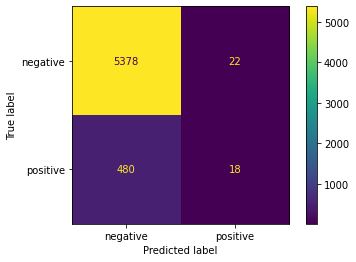

In [ ]:
# Next, the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred, labels=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.92      1.00      0.96      5400
    positive       0.45      0.04      0.07       498

    accuracy                           0.91      5898
   macro avg       0.68      0.52      0.51      5898
weighted avg       0.88      0.91      0.88      5898



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9206510681586979

              precision    recall  f1-score   support

    negative       0.94      0.98      0.96      5400
    positive       0.56      0.29      0.38       498

    accuracy                           0.92      5898
   macro avg       0.75      0.63      0.67      5898
weighted avg       0.91      0.92      0.91      5898



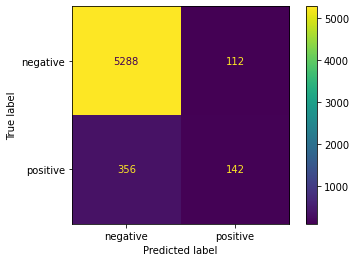

In [ ]:
plot_confusion_matrix(rf, X_test, y_test)
print(metrics.classification_report(y_test, y_pred, labels=['negative', 'positive']))

In [ ]:
from sklearn.cluster import KMeans

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


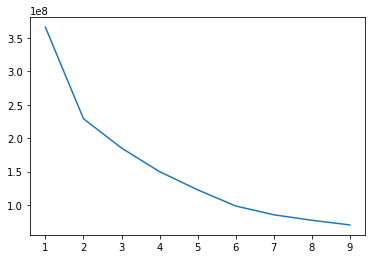

In [ ]:
# Elbow method

def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(X,maxK=10)

In [ ]:
KMeans(n_clusters=2, ).fit(X)

KMeans(n_clusters=2)